<a href="https://colab.research.google.com/github/sisifo3/P_T_2/blob/main/mmocr_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..

/


In [ ]:
!nvcc -V
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Install torch dependencies: (use cu110 since colab has CUDA 11)
!pip install -U torch==1.7.0+cu110 torchvision==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html

# Install mmdetection
!pip install mmdet

# Install mmocr
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -r requirements.txt
!pip install -v -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1 MB 1.8 MB/s eta 0:02:48tcmalloc: large alloc 1147494400 bytes == 0x56291d370000 @  0x7f2efc61a615 0x5628e36714cc 0x5628e375147a 0x5628e36742ed 0x5628e3765e1d 0x5628e36e7e99 0x5628e36e29ee 0x5628e3675bda 0x5628e36e7d00 0x5628e36e29ee 0x5628e3675bda 0x5628e36e4737 0x5628e3766c66 0x5628e36e3daf 0x5628e3766c66 0x5628e36e3daf 0x5628e3766c66 0x5628e36e3daf 0x5628e3676039 0x5628e36b9409 0x5628e3674c52 0x5628e36e7c25 0x5628e36e29ee 0x5628e3675bda 0x5628e36e4737 0x5628e36e29ee 0x5628e3675bda 0x5628e36e3915 0x5628e3675afa 0x5628e36e3c0d 0x5628e36e29ee
     |█████████████████████████████▊  | 1055.7 MB 1.3 MB/s eta 0:01:04tcmalloc: large alloc 1434370048 bytes == 0x5629619c6000 @  0x7f2efc61a615 0x5628e36714cc 0x5628e375147a 0x5628e36742ed 0x5628e3765e1d 0x5628e36e7e99 0x5628e36e29ee 0x5628e3675bda 0x5628e36e7d00 0x5628e36e29ee 0x5628e3675bda 0x5628e36e4737 0x5628e3766c66 0x5628e36e3d

In [ ]:
!pip uninstall mmcv-full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html --no-cache-dir

Found existing installation: mmcv-full 1.3.14
Uninstalling mmcv-full-1.3.14:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/mmcv/*
    /usr/local/lib/python3.7/dist-packages/mmcv_full-1.3.14.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled mmcv-full-1.3.14
Looking in links: https://download.openmmlab.com/mmcv/dist/cu110/torch1.6.0/index.html
     |████████████████████████████████| 324 kB 4.1 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=27565169 sha256=f67de7f10ebdec5d2324d4aa25a6530728c10f9985e9f4b17f9e989ad4d3f2a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6z_dzfo/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(mmcv.__version__)
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check mmocr installation
import mmocr
print(mmocr.__version__)

%cd /mmocr/
!ls

1.7.0+cu110 True
2.17.0
1.3.14
11.1
GCC 7.5
0.3.0
/mmocr
CITATION.cff  docs_zh_CN   mmocr.egg-info   requirements      tests
configs       INFO	   model-index.yml  requirements.txt  tools
demo	      LICENSE	   outputs	    resources
docker	      MANIFEST.in  README.md	    setup.cfg
docs	      mmocr	   README_zh-CN.md  setup.py


In [ ]:
%cd /mmocr/

/mmocr


In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/textrecog/sar/sar_r31_parallel_decoder_toy_dataset.py')


In [ ]:
from mmdet.apis import set_random_seed

# Set up working dir to save files and logs.
cfg.work_dir = './demo/tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.001 / 8
cfg.lr_config.warmup = None
# Choose to log training results every 40 images to reduce the size of log file. 
cfg.log_config.interval = 40

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)



cfg.total_epochs = 1

cfg.prefix = '/content/drive/MyDrive/tecProy/'

#cfg.train_ann_file.img_prefix='/content/drive/MyDrive/test_img_hor/train'
cfg.train_ann_file ='/content/drive/MyDrive/tecProy/label3.txt'

cfg.img_prefix= '/content/drive/MyDrive/tecProy/imgs3'
cfg.train_anno_file1 ='/content/drive/MyDrive/tecProy/label3.txt'

cfg.train_anno_file2 = '/content/drive/MyDrive/tecProy/label3.lmdb'
cfg.test_anno_file1 = '/content/drive/MyDrive/tecProy/label3.lmdb'

cfg.test.ann_file ='/content/drive/MyDrive/tecProy/label3.lmdb'
cfg.test.img_prefix ='/content/drive/MyDrive/tecProy/imgs3'

cfg.train1.img_prefix = '/content/drive/MyDrive/tecProy/imgs3'
cfg.train1.ann_file = '/content/drive/MyDrive/tecProy/label3.txt' 

cfg.train2.img_prefix = '/content/drive/MyDrive/tecProy/imgs3'
cfg.train2.ann_file = '/content/drive/MyDrive/tecProy/label3.lmdb' 



cfg.data.train.datasets[0].img_prefix = "/content/drive/MyDrive/tecProy/imgs3"
cfg.data.train.datasets[0].ann_file = "/content/drive/MyDrive/tecProy/label3.txt" 

cfg.data.test.datasets[0].img_prefix = "/content/drive/MyDrive/tecProy/imgs3"
cfg.data.test.datasets[0].ann_file = "/content/drive/MyDrive/tecProy/label3.lmdb" 

cfg.data.train.datasets[1].img_prefix = "/content/drive/MyDrive/tecProy/imgs3"
cfg.data.train.datasets[1].ann_file = "/content/drive/MyDrive/tecProy/label3.lmdb" 
cfg.data.train.datasets[1].loader.ann_file = "/content/drive/MyDrive/tecProy/label3.lmdb" 


cfg.data.val.datasets[0].img_prefix = "/content/drive/MyDrive/tecProy/imgs3"
cfg.data.val.datasets[0].ann_file = "/content/drive/MyDrive/tecProy/label3.lmdb" 


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
checkpoint_config = dict(interval=1)
log_config = dict(interval=40, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
label_convertor = dict(
    type='AttnConvertor', dict_type='DICT90', with_unknown=True)
model = dict(
    type='SARNet',
    backbone=dict(type='ResNet31OCR'),
    encoder=dict(
        type='SAREncoder', enc_bi_rnn=False, enc_do_rnn=0.1, enc_gru=False),
    decoder=dict(
        type='ParallelSARDecoder',
        enc_bi_rnn=False,
        dec_bi_rnn=False,
        dec_do_rnn=0,
        dec_gru=False,
        pred_dropout=0.1,
        d_k=512,
        pred_concat=True),
    loss=dict(type='SARLoss'),
    label_convertor=dict(
        type='AttnConvertor', dict_type='DICT90', with_unknown=True),
    max_seq_len=30)
optimizer = dict(type='Adam', lr=0.000125)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step', step=[3, 4], warmup=None)
total_e

In [ ]:
from mmocr.datasets import build_dataset
from mmocr.models import build_detector
from mmocr.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/mmocr/mmocr/apis/train.py:81: UserWarning: config is now expected to have a `runner` section, please set `runner` in your config.
  'please set `runner` in your config.', UserWarning)
2021-09-29 23:13:42,738 - mmocr - INFO - Start running, host: root@5eac83d9775e, work_dir: /mmocr/demo/tutorial_exps
2021-09-29 23:13:42,744 - mmocr - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LO

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 100/100, 6.7 task/s, elapsed: 15s, ETA:     0s

2021-09-29 23:16:18,894 - mmocr - INFO - 
Evaluateing /content/drive/MyDrive/tecProy/label3.lmdb with 100 images now
2021-09-29 23:16:18,914 - mmocr - INFO - Epoch(val) [1][13]	0_word_acc: 1.0000, 0_word_acc_ignore_case: 1.0000, 0_word_acc_ignore_case_symbol: 1.0000, 0_char_recall: 1.0000, 0_char_precision: 1.0000, 0_1-N.E.D: 1.0000


In [ ]:
from mmocr.apis import init_detector, model_inference

img = '/content/drive/MyDrive/tecProy/imgs3/img2.jpg'
checkpoint = "./demo/tutorial_exps/epoch_1.pth"
out_file = 'outputs/1036169.jpg'

model = init_detector(cfg, checkpoint, device="cuda:0")
if model.cfg.data.test['type'] == 'ConcatDataset':
    model.cfg.data.test.pipeline = model.cfg.data.test['datasets'][0].pipeline


result = model_inference(model, img)
print(f'result: {result}')

img = model.show_result(
        img, result, out_file=out_file, show=False)

mmcv.imwrite(img, out_file)

Use load_from_local loader
result: {'text': '3B057175K', 'score': [0.9898375272750854, 0.9985852241516113, 0.9838175773620605, 0.9745091795921326, 0.8366990089416504, 0.9368370175361633, 0.9121363759040833, 0.9451451301574707, 0.9721117615699768]}


True

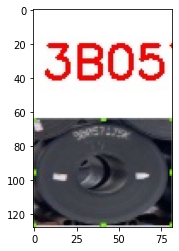

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
predicted_img = mmcv.imread('./outputs/1036169.jpg')
plt.figure(figsize=(4, 4))
plt.imshow(mmcv.bgr2rgb(predicted_img))
plt.show()

In [ ]:
!python /mmocr/tools/data/utils/txt2lmdb.py -i /content/drive/MyDrive/tecProy/label3.txt -o /content/drive/MyDrive/tecProy/label3.lmdb


#/content/drive/MyDrive/tecProy/label2.txt

create database /content/drive/MyDrive/tecProy/label3.lmdb
[23:12:36-23:12:36], processing [0-10] / 10
done
